In [22]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl as xl
from lmfit import minimize, Parameters, report_fit

In [23]:
'''Import data and get the length of data'''
x = []
y = []
wb = xl.load_workbook('D:\getdata\pl_gaussian\single_peak_gaussian.xlsx')
sheet = wb['Sheet1']

for row in range(1, sheet.max_row + 1):
    x.append(sheet.cell(row,1).value)
for row in range(1, sheet.max_row + 1):
    y.append(sheet.cell(row,2).value)

x_data =np.array(x)
y_data =np.array(y)
n = len(x_data)
print(x_data)
print(y_data)

[27.1878211  27.39941959 27.59435358 27.80654143 28.01822121 28.23059196
 28.44314561 28.6224922  28.84408939 29.05763884 29.25332477 29.46583778
 29.66924628 29.87255316 30.07569747 30.28693016 30.49737026 30.69941715
 30.91014177 31.11257479 31.30649265 31.5266063  31.72127609 31.933342
 32.13685212 32.34030126]
[1.36701486 1.34505024 1.346598   1.37331404 1.35806399 1.39988782
 1.45681944 1.57084769 1.67477564 1.81396079 1.87761836 1.93119269
 1.93273477 1.92588362 1.90560334 1.85342313 1.73577583 1.6248488
 1.53070251 1.4516697  1.3692853  1.35067227 1.33039767 1.34704185
 1.35697714 1.3618765 ]


In [24]:
def g(x,a):
    g = a[0]+a[1]*np.exp(-4*np.log(2)*(x-a[2])**2/a[3]**2)/(a[3]*np.sqrt(np.pi/(4*np.log(2))))
    return g

In [25]:
def residual(params, x, data):
    v = params.valuesdict()
    a = [v['a1'], v['a2'], v['a3'], v['a4']]
    model = g(x,a)
    return (data-model)

params = Parameters()
params.add('a1', value=1)
params.add('a2', value=1)
params.add('a3', value=30)
params.add('a4', value=2.5)

out = minimize(residual, params, args=(x_data, y_data))
report_fit(out)
fitted_params = []
for name, param in out.params.items():
    fitted_params.append(param.value)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 26
    # variables        = 4
    chi-square         = 0.01421385
    reduced chi-square = 6.4608e-04
    Akaike info crit   = -187.302505
    Bayesian info crit = -182.270119
[[Variables]]
    a1:  1.33237798 +/- 0.01004172 (0.75%) (init = 1)
    a2:  1.22694249 +/- 0.04693398 (3.83%) (init = 1)
    a3:  29.7230786 +/- 0.01682902 (0.06%) (init = 30)
    a4:  1.80484671 +/- 0.05586446 (3.10%) (init = 2.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a1, a2) = -0.868
    C(a2, a4) = 0.817
    C(a1, a4) = -0.708


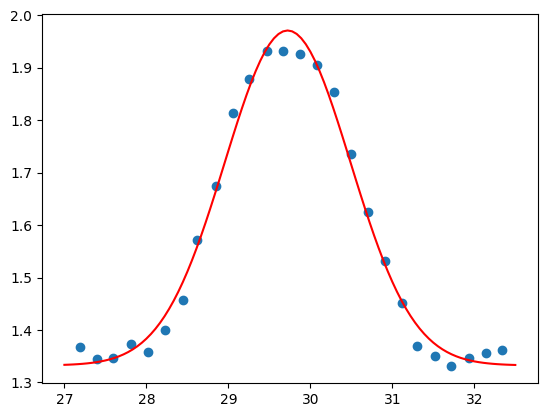

In [26]:
plt.scatter(x_data,y_data)
x = np.linspace(27,32.5,100)
y = g(x,fitted_params)
plt.plot(x,y,'r')
plt.show()